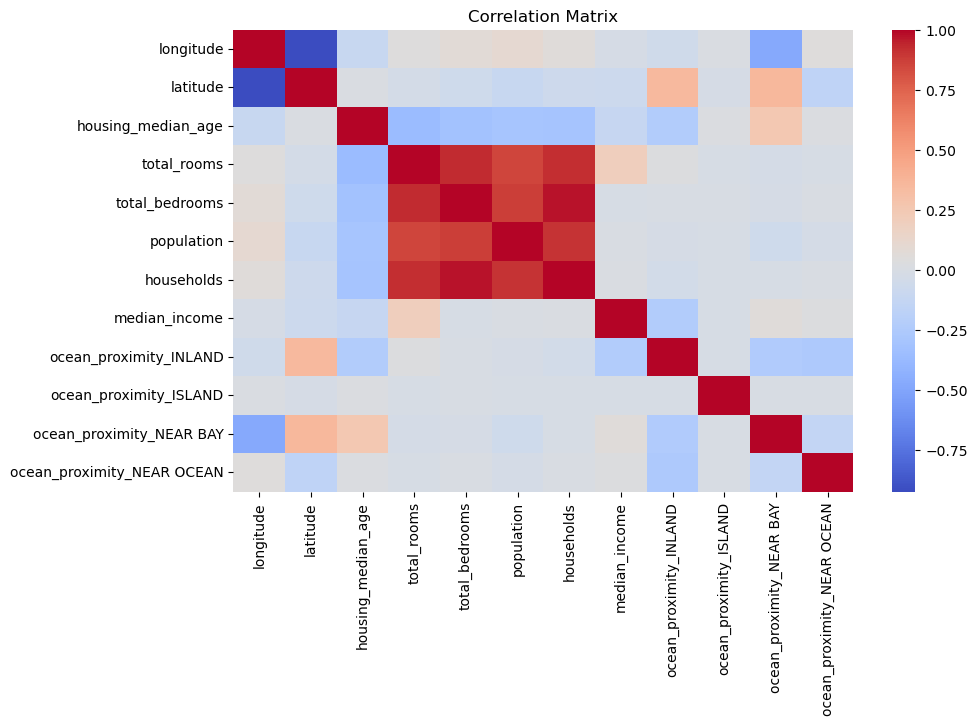

Linear Regression: (np.float64(70031.41991955663), 0.6257351821159707)
Ridge Regression : (np.float64(70028.47868451895), 0.6257666187962734)


In [9]:
import os
os.getcwd()
os.listdir()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("cleaned_california_housing.csv")

# Features & target
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Correlation matrix (multicollinearity)
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluation
def evaluate(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)), r2_score(y_true, y_pred)

print("Linear Regression:", evaluate(y_test, y_pred_lr))
print("Ridge Regression :", evaluate(y_test, y_pred_ridge))
